### DIAMONDS VERİSETİ 

Veriseti sütunları:  
.price: Fiyat bilgisi (\$326--\$18,823)    
.carat: Elmas ağırlığı (0.2--5.01)  
.cut  : Kalite (Fair, Good, Very Good, Premium, Ideal)  
.color: Elmasın rengi (from J (worst) to D (best))  
.clarity:Elmasın ne kadar net olduğuna dair ölçü (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))  
.x     : Uzunluk (length) mm (0--10.74)  
.y     : Genişlik (width)mm (0--58.9)  
.z     : Derinlik (Depth) (0--31.8)  
.depth : Toplam Derinlik Yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43--79)  
.table : En geniş noktaya göre elmas tepesinin genişliği (43--95)  

### Gerekli Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Verisetinin Yüklenmesi
Seaborn içerisinden "diamonds" veriseti kullanılmıştır.

In [2]:
df=sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# Veriye İlk Bakış
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [7]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [8]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [9]:
df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

Veri setindeki kategorik değişkenler nominal değil ordinal kategorik değişken. Bu yüzden veri setinin açıklamasındaki sıraya
göre bu değişkenlerin ifade edilmesi gerekmektedir.

In [18]:
from pandas.api.types import CategoricalDtype

In [19]:
df.cut=df.cut.astype(CategoricalDtype(ordered=True))

In [20]:
df.dtypes

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [21]:
df.cut.head(2)

0      Ideal
1    Premium
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

Yukarıda görüldüğü gibi cut değişkenine ait kategori sıralamaları yanlış.Olması gereken:
Fair<Good<Very Good<Premium<Ideal

In [22]:
cut_kategoriler=["Fair","Good","Very Good","Premium","Ideal"]

In [23]:
df.cut=df.cut.astype(CategoricalDtype(categories=cut_kategoriler,ordered=True))

In [24]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

Cut değişkeni için yapılan işlemler diğer kategorik değişkenler için de yapılmalıdır

In [26]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [27]:
color_kategoriler=["J","I","H","G","F","E","D"]

In [28]:
df.color=df.color.astype(CategoricalDtype(categories=color_kategoriler,ordered=True))

In [29]:
df["color"].head(1)

0    E
Name: color, dtype: category
Categories (7, object): [J < I < H < G < F < E < D]

In [30]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [31]:
clarity_kategoriler=["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]

In [32]:
df.clarity=df.clarity.astype(CategoricalDtype(categories=clarity_kategoriler,ordered=True))

In [33]:
df["clarity"].head(1)

0    SI2
Name: clarity, dtype: category
Categories (8, object): [I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF]

## Görselleştirme

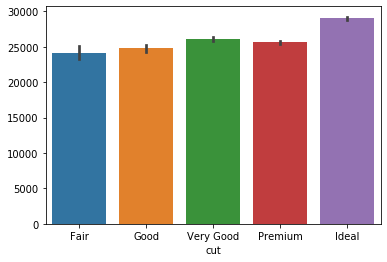

In [35]:
sns.barplot(x="cut",y=df["cut"].index,data=df)

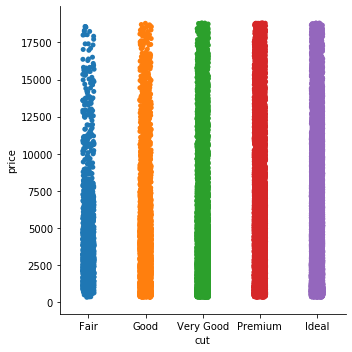

In [36]:
sns.catplot(x="cut",y="price",data=df)

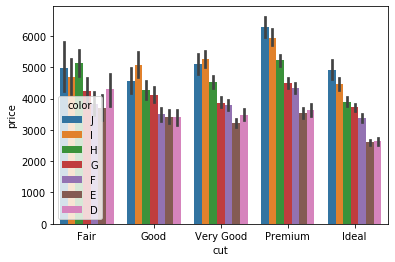

In [38]:
sns.barplot(x="cut",y="price",hue="color",data=df)

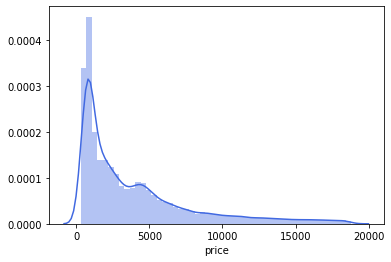

In [46]:
sns.distplot(df["price"],color="royalblue")

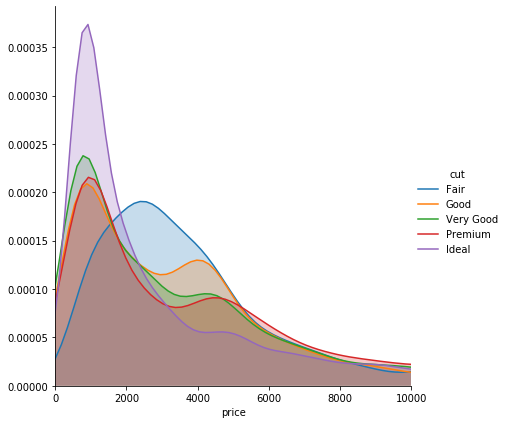

In [50]:
sns.FacetGrid(df,hue="cut",height=6,xlim=(0,10000)).map(sns.kdeplot,"price",shade=True).add_legend()

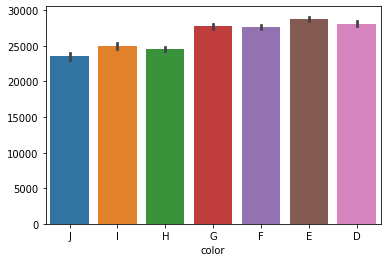

In [52]:
sns.barplot(x="color",y=df["cut"].index,data=df)

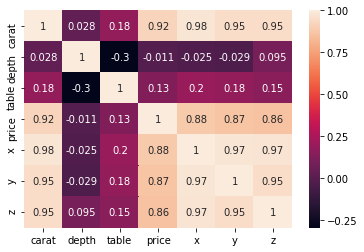

In [54]:
sns.heatmap(df.corr(),annot=True)